# ***1.Import the required Libraries***

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import tensorflow as tf
import random
from tensorflow.keras import models,layers
import cv2
from sklearn.model_selection import train_test_split as tts
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# ***2.Importing the training dataset and image visualization***

In [104]:
label={"Benign":0,"Early":1,"Pre":2,"Pro":3}
name={0:"Benign",1:"Early",2:"Pre",3:"Pro"}

In [105]:
x=[]
y=[]
size=(224,224)
for i in os.listdir("/content/drive/MyDrive/DeepAthon/Original/Benign"):
  img=cv2.imread(os.path.join("/content/drive/MyDrive/DeepAthon/Original/Benign",i),1)
  img_arr=cv2.resize(img,size)
  x.append(list(img_arr))
  y.append(label["Benign"])

In [106]:
for i in os.listdir("/content/drive/MyDrive/DeepAthon/Original/Early"):
  img=cv2.imread(os.path.join("/content/drive/MyDrive/DeepAthon/Original/Early",i),1)
  img_arr=cv2.resize(img,size)
  x.append(list(img_arr))
  y.append(label["Early"])

In [107]:
for i in os.listdir("/content/drive/MyDrive/DeepAthon/Original/Pre"):
  img=cv2.imread(os.path.join("/content/drive/MyDrive/DeepAthon/Original/Pre",i),1)
  img_arr=cv2.resize(img,size)
  x.append(list(img_arr))
  y.append(label["Pre"])

In [108]:
for i in os.listdir("/content/drive/MyDrive/DeepAthon/Original/Pro"):
  img=cv2.imread(os.path.join("/content/drive/MyDrive/DeepAthon/Original/Pro",i),1)
  img_arr=cv2.resize(img,size)
  x.append(list(img_arr))
  y.append(label["Pro"])

In [109]:
len(x),len(y) # checking whether every imges are appended correctly
#totaly 3256 images

(3256, 3256)

In [110]:
def plot(i):
  plt.figure(figsize=(1,1))
  plt.imshow(x[i])
  plt.title(name[y[i]])

None None None None


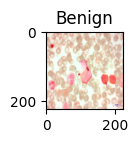

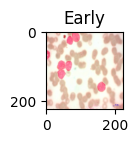

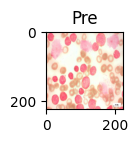

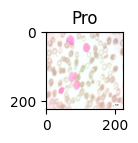

In [111]:
print(plot(0),plot(643),plot(1777),plot(3000))

# ***3.Import the Test dataset and visualisation***

In [112]:
x_test_val=[]
y_test_val=[]
for i in os.listdir("/content/drive/MyDrive/DeepAthon/Segmented/Benign"):
  img=cv2.imread(os.path.join("/content/drive/MyDrive/DeepAthon/Segmented/Benign",i),1)
  img_arr=cv2.resize(img,size)
  x_test_val.append(list(img_arr))
  y_test_val.append(label["Benign"])

In [113]:
for i in os.listdir("/content/drive/MyDrive/DeepAthon/Segmented/Benign"):
  img=cv2.imread(os.path.join("/content/drive/MyDrive/DeepAthon/Segmented/Benign",i),1)
  img_arr=cv2.resize(img,size)
  x_test_val.append(list(img_arr))
  y_test_val.append(label["Early"])

In [114]:
for i in os.listdir("/content/drive/MyDrive/DeepAthon/Segmented/Benign"):
  img=cv2.imread(os.path.join("/content/drive/MyDrive/DeepAthon/Segmented/Benign",i),1)
  img_arr=cv2.resize(img,size)
  x_test_val.append(list(img_arr))
  y_test_val.append(label["Pre"])

In [115]:
for i in os.listdir("/content/drive/MyDrive/DeepAthon/Segmented/Benign"):
  img=cv2.imread(os.path.join("/content/drive/MyDrive/DeepAthon/Segmented/Benign",i),1)
  img_arr=cv2.resize(img,size)
  x_test_val.append(list(img_arr))
  y_test_val.append(label["Pro"])

In [116]:
len(x_test_val),len(y_test_val)

(2016, 2016)

In [117]:
test_df=[]
for i,j in zip(x_test_val,y_test_val):
  test_df.append([i,j])
random.shuffle(test_df)

t1=[]
t2=[]
for i,j in test_df:
  t1.append(i)
  t2.append(j)
t1=np.array(t1)
t2=np.array(t2)

In [118]:
def plot_test(x):
  plt.figure(figsize=(1,1))
  plt.imshow(x_test_val[x])
  plt.title(name[y_test_val[x]])

(None, None, None, None)

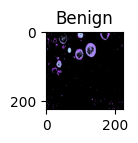

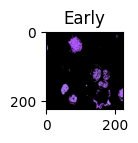

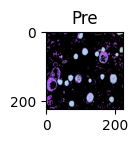

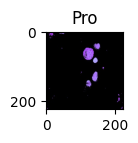

In [119]:
plot_test(0),plot_test(600),plot_test(1400),plot_test(2000)

In [120]:
df=[]
for i,j in zip(x,y):
  df.append([i,j])

In [121]:
import random
random.shuffle(df)

In [122]:
X=[]
Y=[]
for i,j in df:
  X.append(i)
  Y.append(j)
X=np.array(X)
Y=np.array(Y)

In [123]:
x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.2,shuffle=True)
x_train.shape,x_test.shape

((2604, 224, 224, 3), (652, 224, 224, 3))

#### The dataset are shuffled to perform the training the model and the converd into numpy array for the models expectation and the dataset is splited to train the dataset


# ***4.Model implimentation and Prediction***

In [124]:
m_model=tf.keras.applications.vgg19.VGG19()
model1=models.Sequential()
for i in m_model.layers[:-1]:
  model1.add(i)
for layer in model1.layers:
    layer.trainable = False
model1.add(tf.keras.layers.Dense(4,activation=tf.nn.softmax))

In [125]:
model1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
    )

In [126]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 139,586,628 (532.48 MB)

 Trainable params: 16,388 (64.02 KB)

 Non-trainable params: 139,570,240 (532.42 MB)

In [128]:
history=model1.fit(x_train,y_train,batch_size=128,
                  verbose=1,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 846ms/step - accuracy: 0.4999 - loss: 1.3776 - val_accuracy: 0.8758 - val_loss: 0.3403
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 707ms/step - accuracy: 0.8889 - loss: 0.3239 - val_accuracy: 0.9356 - val_loss: 0.1980
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 727ms/step - accuracy: 0.9416 - loss: 0.1905 - val_accuracy: 0.9494 - val_loss: 0.1446
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 741ms/step - accuracy: 0.9523 - loss: 0.1584 - val_accuracy: 0.9678 - val_loss: 0.1169
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 856ms/step - accuracy: 0.9646 - loss: 0.1240 - val_accuracy: 0.9724 - val_loss: 0.1069
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 861ms/step - accuracy: 0.9696 - loss: 0.1122 - val_accuracy: 0.9770 - val_loss: 0.1008
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 837ms/step - accuracy: 0.9739 - loss: 0.0966 - val_accuracy: 0.9785 - val_loss: 0.0892
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 834ms/step - accuracy: 0.9812 - loss: 0.0839 - val_accu

In [129]:
y_pre=model1.predict(x_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step


In [130]:
y_pre=np.argmax(y_pre,axis=1)

In [131]:
model1.evaluate(x_test, y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.9877 - loss: 0.0612


[0.055650413036346436, 0.987730085849762]

# ***4.Model Metrics Visualization***

In [132]:
class_names = ['Benign', 'Early', 'Pre', 'Pro']
print(classification_report(y_test, y_pre, target_names=class_names))

              precision    recall  f1-score   support

      Benign       0.98      0.95      0.97       107
       Early       0.97      0.99      0.98       190
         Pre       1.00      0.99      1.00       183
         Pro       1.00      1.00      1.00       172

    accuracy                           0.99       652
   macro avg       0.99      0.98      0.99       652
weighted avg       0.99      0.99      0.99       652



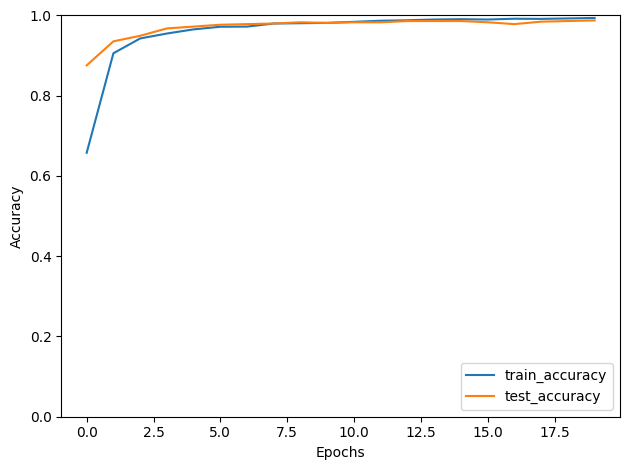

In [139]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train_accuracy','test_accuracy'],loc='lower right')
plt.ylim(0,1.00)
plt.tight_layout()

<ipython-input-140-484238f1f910>:6: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0.00,1,00)


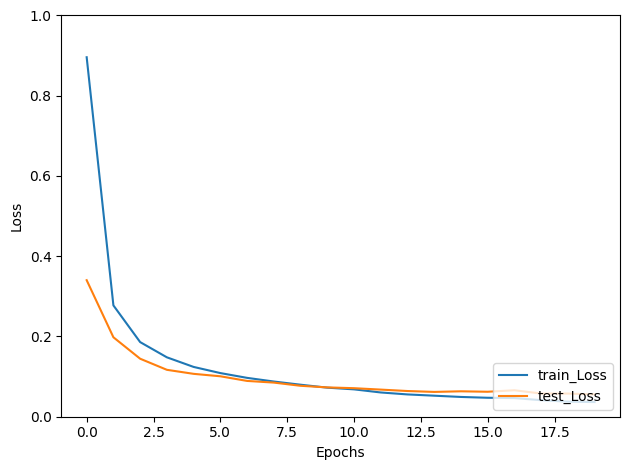

In [140]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train_Loss','test_Loss'],loc='lower right')
plt.ylim(0.00,1,00)
plt.tight_layout()

<Figure size 3000x3000 with 0 Axes>

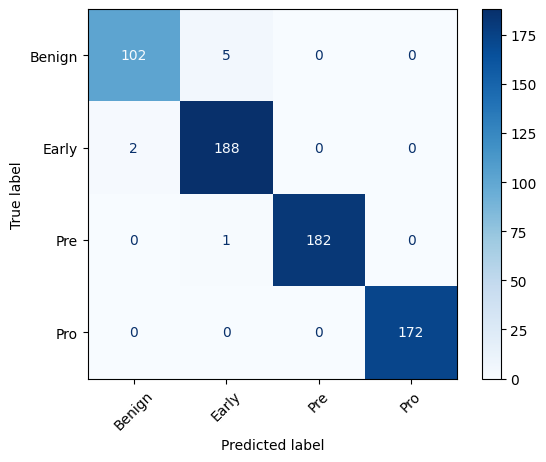

In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pre,labels=[0,1,2,3])
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
plt.figure(figsize=(30, 30))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()

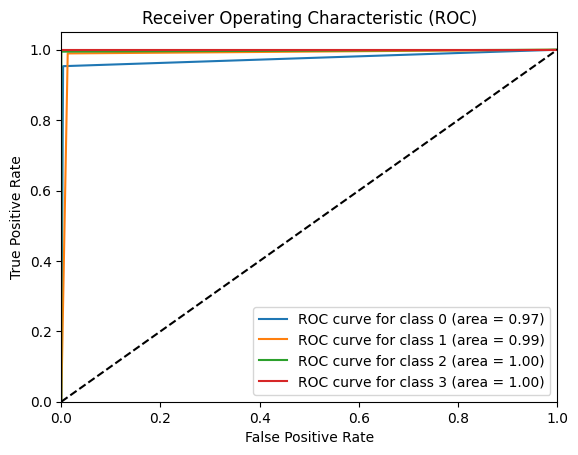

In [136]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_predicted = y_pre

classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)
y_predicted_binarized = label_binarize(y_predicted, classes=classes)

n_classes = len(classes)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_predicted_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {classes[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# **6.Model Saved**

In [142]:
model1.save('my_model.h5')